In [12]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

data = pd.read_csv('Online-eCommerce.csv')
data = data.dropna()

In [13]:
# Перетворюємо колонку Order_Date у формат datetime
data['Order_Date'] = pd.to_datetime(data['Order_Date'], errors='coerce')

# Перевіряємо, чи немає пропущених значень після перетворення
print(data['Order_Date'].isna().sum())  # Якщо є NaN, це можуть бути некоректні дати
data = data.dropna(subset=['Order_Date'])

# Групуємо дані за іменами клієнтів та обчислюємо ключові показники
customer_data = data.groupby('Customer_Name').agg({
    'Total_Sales': 'sum',         # Загальна сума продажів
    'Quantity': 'sum',            # Загальна кількість проданих товарів
    'Cost': 'mean',               # Середня вартість товару
    'Category': lambda x: x.mode()[0],  # Найчастіша категорія товарів
    'Order_Date': lambda x: (pd.Timestamp.now() - x.max()).days  # Дні з останньої покупки
}).reset_index()

# Перейменовуємо колонки для зручності
customer_data.columns = [
    'Customer_Name', 'Total_Spent', 'Total_Quantity', 'Avg_Cost', 
    'Favorite_Category', 'Days_Since_Last_Purchase'
]

display(customer_data.head())

3056


,Customer_Name,Total_Spent,Total_Quantity,Avg_Cost,Favorite_Category,Days_Since_Last_Purchase
0,Adhir Samal,1042717.0,113.0,7025.434783,Monitor,726
1,Aditya Agarwal,1063855.0,112.0,7365.918367,Monitor,726
2,Ajay Sharma,989872.0,116.0,6869.400000,Monitor,724
3,Akhilesh Kumar,712270.0,107.0,4801.666667,Cabinet,726
4,Amit Singh,1056848.0,124.0,6850.400000,Monitor,699


In [14]:
from sklearn.preprocessing import StandardScaler

# Вибираємо числові ознаки для кластеризації
X = customer_data[['Total_Spent', 'Total_Quantity', 'Avg_Cost', 'Days_Since_Last_Purchase']]

# Масштабуємо дані
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

,Customer_Name,Total_Spent,Total_Quantity,Avg_Cost,Favorite_Category,Days_Since_Last_Purchase,Cluster
0,Adhir Samal,1042717.0,113.0,7025.434783,Monitor,726,1
1,Aditya Agarwal,1063855.0,112.0,7365.918367,Monitor,726,1
2,Ajay Sharma,989872.0,116.0,6869.400000,Monitor,724,1
3,Akhilesh Kumar,712270.0,107.0,4801.666667,Cabinet,726,0
4,Amit Singh,1056848.0,124.0,6850.400000,Monitor,699,1
5,Aniruddha Kekapure,829712.0,124.0,5266.666667,CPU,700,0
6,Ashish Kumar,782938.0,116.0,5084.693878,CPU,692,0
7,Ashish Pandey,769535.0,114.0,5055.400000,CPU,726,0
8,Ashwini Adsare,1272531.0,134.0,7133.400000,Monitor,720,1
9,Aslam Raza,1117532.0,125.0,6375.102041,Monitor,700,1


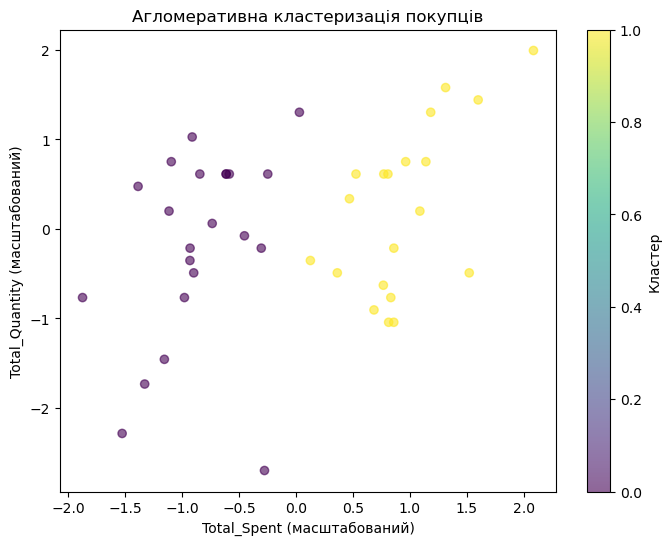

In [15]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=2)

assignment = agg.fit_predict(X_scaled)
customer_data['Cluster'] = assignment

display(customer_data.head(100))

# Візуалізуємо результати
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=customer_data['Cluster'], cmap='viridis', alpha=0.6)
plt.title("Агломеративна кластеризація покупців")
plt.xlabel("Total_Spent (масштабований)")
plt.ylabel("Total_Quantity (масштабований)")
plt.colorbar(label='Кластер')
plt.show()


In [16]:
from sklearn.metrics import silhouette_score

# Обчислюємо коефіцієнт силуету
silhouette_avg = silhouette_score(X_scaled, assignment)
print(f"Середній коефіцієнт силуету: {silhouette_avg:.2f}")

Середній коефіцієнт силуету: 0.40


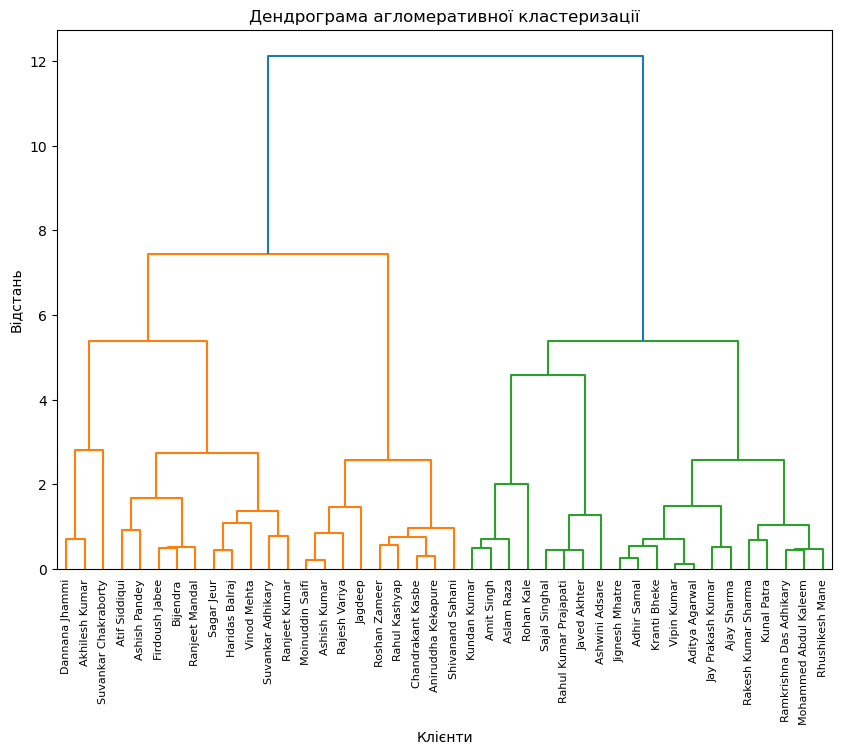

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X_scaled, method='ward')

# Побудова дендрограми
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=customer_data['Customer_Name'].values,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title("Дендрограма агломеративної кластеризації")
plt.xlabel("Клієнти")
plt.ylabel("Відстань")
plt.show()